# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# Load the packages and clean the dataset

For this illustration, we are continuing to use the mtcars dataset in R.

1) (DV: mpg) The approximate miles per gallon for city driving,

2) (IV1: hp) Horsepower for the given vehicles, and

3) (IV2: cyl) The number of cylinders in the vehicles engine.

In [1]:
## Install easystats package
install.packages("easystats")

## Load in the packages
library(tidyverse) ## Several useful functions
library(easystats) ## Several useful functions

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘bayestestR’, ‘correlation’, ‘datawizard’, ‘effectsize’, ‘insight’, ‘modelbased’, ‘parameters’, ‘performance’, ‘report’, ‘see’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# Attaching packages: easystats 0.7.4
✔ bayestestR  0.15.2   ✔ correlation 0.8.6 
✔ datawizard  1.0.0    ✔ effectsize  1.0.0 
✔ insight     1.0.2    ✔ modelbased  0.9.0 
✔ performance 0.13.0   ✔ parameters  0.24.1
✔ re

In [6]:
## Load the dataset into R
data(mtcars)

## Convert the cyl column to be of the type factor
mtClean <-
  mtcars %>%
  mutate(cyl = as.factor(cyl))

## View the first several rows of the relevant variables in our dataset
mtClean %>%
  select(mpg, hp, cyl) %>%
  head(n = 10)

,mpg,hp,cyl
,<dbl>,<dbl>,<fct>
Mazda RX4,21.0,110,6
Mazda RX4 Wag,21.0,110,6
Datsun 710,22.8,93,4
Hornet 4 Drive,21.4,110,6
Hornet Sportabout,18.7,175,8
Valiant,18.1,105,6
Duster 360,14.3,245,8
Merc 240D,24.4,62,4
Merc 230,22.8,95,4


# Visualize the data

One of the first things we tend to do in data analysis is to visualize the data to see how they compare. Given 2 predictors (hp and cyl) and our outcome (mpg), we can create 3 types of visualziations:

1) The relationship between cyl and mpg

2) The relationship between hp and mpg

3) the *joint* relationship between (a) hp and cyl and (b) mpg

## Cyl and mpg

The cylinders variable is categorical, with three levels, and the outcome is continuous. We can simply use a series of boxplots, one for each categorical level, to depict the relationship with the outcome.

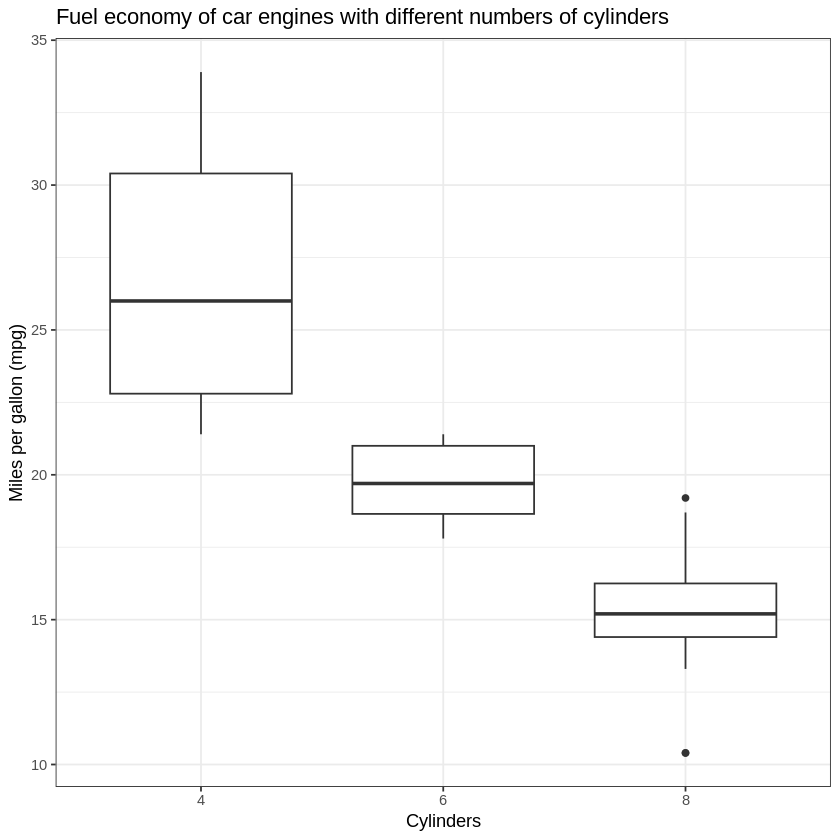

In [8]:
## Series of boxplots based on the categorical variable and the outcome
ggplot(data = mtClean, mapping = aes(x = cyl, y = mpg)) +
  geom_boxplot() +
  labs(x = "Cylinders", y = "Miles per gallon (mpg)", title = "Fuel economy of car engines with different numbers of cylinders") +
  theme_bw()

## hp and mpg

The horsepower variable is continuous with many different observations and the outcome variable is continuous. For this combination of variables, we shall examine a scatterplot.

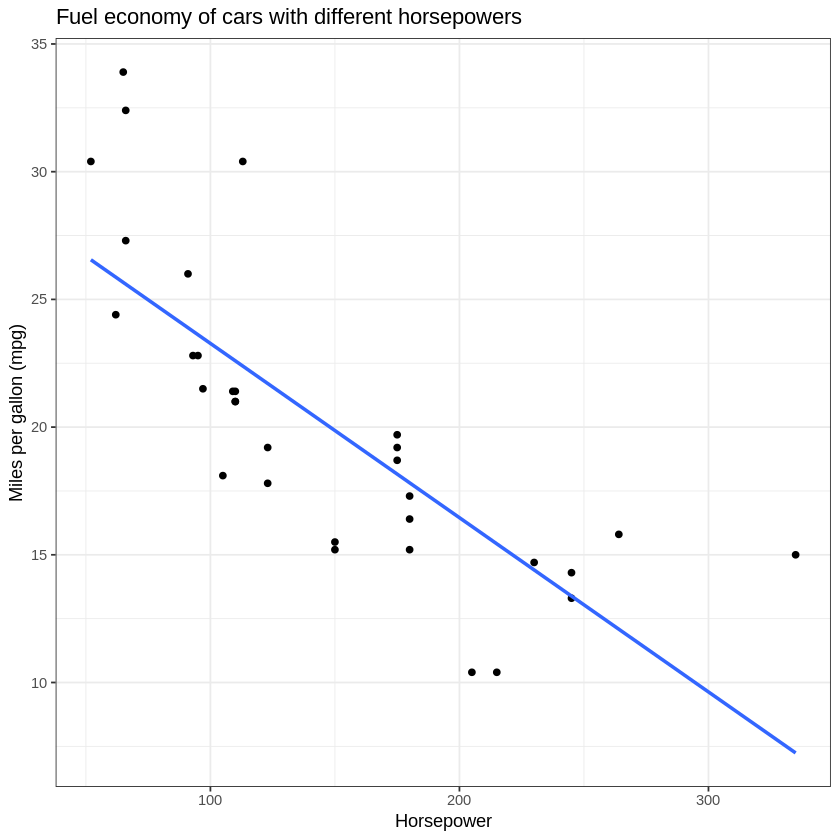

In [10]:
## Scatterplot depicting the relationship between hp and mpg
ggplot(data = mtClean, mapping = aes(x = hp, y = mpg)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, formula = y ~ x) +
  labs(x = "Horsepower", y = "Miles per gallon (mpg)", title = "Fuel economy of cars with different horsepowers") +
  theme_bw()

## (cyl & hp) and mpg

Here, we have one continuous variable (hp) and one categorical variable (cyl). We can essentially draw a line-of-best-fit that is unique to each level of the categorical variable (i.e., 4, 6, and 8).

Assuming we have converted the cyl variable to be a factor (we have), we can achieve this using the color argument in the aesthetics mappings. See the code below for an example.

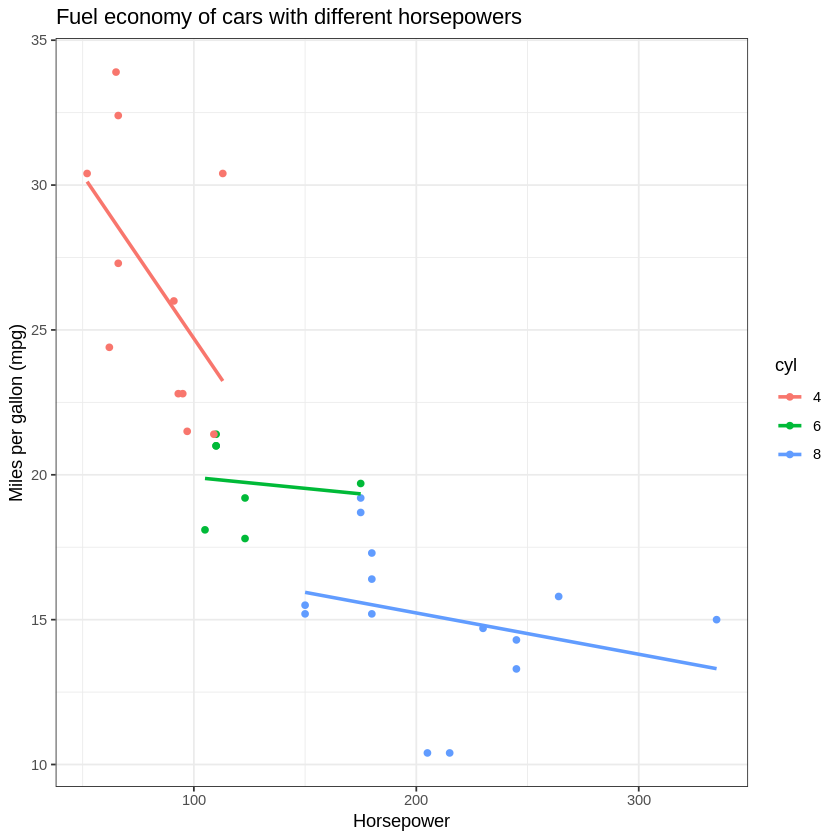

In [12]:
## A scatterplot color-coded for the categorical variable
ggplot(data = mtClean, mapping = aes(x = hp, y = mpg, color = cyl)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, formula = y ~ x) +
  labs(x = "Horsepower", y = "Miles per gallon (mpg)", title = "Fuel economy of cars with different horsepowers") +
  theme_bw()

# Main effects only model

Here, we are interested in the dependent variable of miles per gallon (mpg) and whether there are influences from the cylinders or horsepower of the vehicles.

The general regression equation is as follows: $\hat{mpg} = b_0 + b_1 * hp + b_2 * cyl$

This is a main effects only model because we have the main effect of horsepower and cylinders without any interaction effects.

However, the cylinders variable is categorical so we have to incorporate 2 dummy codes (for the 3 categorical levels): $\hat{mpg} = b_0 + b_1*hp + b_2 * cyl[6] + b_3 * cyl[8]$

In [13]:
## Predicting the mpg based on the car's cylinders and horsepower
ModCyl <- lm(mpg ~ hp + cyl, data = mtClean)

## Report the estimated model parameters
parameters(ModCyl)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),28.65011816,1.5877870,0.95,25.39768395,31.902552374,18.044056,28,5.921199e-17
hp,-0.02403883,0.0154079,0.95,-0.05560048,0.007522814,-1.560163,28,1.299540e-01
cyl6,-5.96765508,1.6392776,0.95,-9.32556307,-2.609747083,-3.640418,28,1.092089e-03
cyl8,-8.52085075,2.3260749,0.95,-13.28559928,-3.756102224,-3.663188,28,1.028617e-03


## Interpret the regression equation

We already have our general regression model with the terms/effects but we did not show the full regression equation with the estimated effects. Here, we will include the estimated regression weights for our model and try to interpret them.

Filling in the equation with the estimated parameters, we have the following: $\hat{mpg} = 28.65 -.02*hp -5.97 * cyl[6] -8.52 * cyl[8]$

*Intercept* (i.e., $b_0 = 28.65$): When the hp is zero and we examine the referent category of cylinders equals 4, the expected mpg is about 28.

*Slope* (i.e., $b_1 = -.02$): For every 1-unit increase in horsepower, holding other variables constant, we can expect a _decrease_ of about .02 mpg.

*Categorical offset for cyl = 6* (i.e., $b_2 = -5.97$): To get the y-intercept, we must compare this value to the referent category (i.e., cyl = 4), which is the intercept. This means the average mpg for vehicles with 6 cylinders is $28.65 - 5.97 = 22.68$.

*Categorical offset for cyl = 8* (i.e., $b_3 = -8.52$): To get the y-intercept, we must compare this value to the referent category (i.e., cyl = 4), which is the intercept. This means the average mpg for vehicles with 8 cylinders is $28.65 - 8.52 = 20.13$.

# Specifying main effects and interactions

We will continue to use the regression formula syntax to specify our regression models. **We have two ways to incorporate interactions terms in our model**. In this example, we are estimating the interaction between the hp and cyl variables.

1) Conjoined using a colon (:). This will allow us to include only the interaction effects we have specified and no others.

2) Conjoined using an asterisks (*). This will include all main effects and interactions associated with the given variables. This is a more general approach and typically the more preferable approach, particularly for models with more than two variables.

The general regression equation for the interaction effects model is as follows: $\hat{mpg} = b_0 + b_1 \cdot hp + b_2 \cdot cyl + b_3 \cdot hp \cdot cyl$.

This is an interaction effects model because we have a term ($b_3$) associated with $hp \cdot cyl$, the interaction between cylinders and horsepower.

Because the cylinders variable is categorical, we have to incorporate dummy codes: $\hat{mpg} = b_0 + b_1 \cdot hp + b_2 \cdot cyl[6] + b_3 \cdot cyl[8] + b_4 \cdot hp \cdot cyl[6] + b_5 \cdot hp \cdot cyl[8]$. This is because we have a separate interaction term for each level of `cyl`. For instance, the interaction between hp & cyl[4] may differ from the interaction term between hp & cyl[6], we need to separately estimated these values.

That is a big equation but we can break it down:

- $b_0$ corresponds to the intercept, which is also the referent for the category of 4 cylinders.

- $b_1$ is the slope (i.e., weight) associated with the horsepower variable. With the categorical variable, this is also the referent slope for the category of 4 cylinders.

- $b_2$ is the "offset" intercept value associated with the dummy coded term/category for 6 cylinders. To get the intercept of this category level, we compare this value to the referent $b_0$ intercept weight.

- $b_3$ is the "offset" intercept value associated with the dummy coded term/category for 8 cylinders. To the the intercept of this category level, we compare this value to the referent $b_0$ intercept weight.

- $b_4$ is the "offset" slope value for the relationship between horsepower and the outcome within the category level of having 6 cylinders. To get the slope for this category, we compare this offset value to the referent slope $b_1$.

- $b_5$ is the "offset" slope value for the relationship between horsepower and the outcome within the category level of having 8 cylinders. To get the slope for this category, we compare this offset value to the referent slope $b_1$.

In [14]:
## Estimating regression model with interaction terms

## Approach 1: Using the colon (:) method
ModHPCyl1 <- lm(formula = mpg ~ hp + cyl + hp:cyl, data = mtClean)

## Approach 2: Using the asterisks (*) method
ModHPCyl2 <- lm(formula = mpg ~ hp * cyl, data = mtClean)


## Examining the output

Notice that the two approaches have the exact same model terms and the weights associated with each term are literally identical!

In [15]:
## Extract the estimated weights/coefficients from the first method
parameters(ModHPCyl1)

## Extract the estimated weights/coefficients from the second method
parameters(ModHPCyl2)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),35.98302564,3.88907772,0.95,27.988911895,43.97713938,9.252329,26,1.042337e-09
hp,-0.11277589,0.04574695,0.95,-0.206810088,-0.01874169,-2.465211,26,2.061364e-02
cyl6,-15.30917451,7.43456194,0.95,-30.591135429,-0.02721358,-2.059190,26,4.962243e-02
cyl8,-17.90295193,5.25961235,0.95,-28.714239963,-7.09166390,-3.403854,26,2.163657e-03
hp:cyl6,0.10516262,0.06848323,0.95,-0.035606674,0.24593191,1.535597,26,1.367182e-01
hp:cyl8,0.09853177,0.04862384,0.95,-0.001415964,0.19847950,2.026409,26,5.309562e-02


Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),35.98302564,3.88907772,0.95,27.988911895,43.97713938,9.252329,26,1.042337e-09
hp,-0.11277589,0.04574695,0.95,-0.206810088,-0.01874169,-2.465211,26,2.061364e-02
cyl6,-15.30917451,7.43456194,0.95,-30.591135429,-0.02721358,-2.059190,26,4.962243e-02
cyl8,-17.90295193,5.25961235,0.95,-28.714239963,-7.09166390,-3.403854,26,2.163657e-03
hp:cyl6,0.10516262,0.06848323,0.95,-0.035606674,0.24593191,1.535597,26,1.367182e-01
hp:cyl8,0.09853177,0.04862384,0.95,-0.001415964,0.19847950,2.026409,26,5.309562e-02


## Interpret the regression output

We already have our general regression model with the terms/effects to explore but what we did not have was the weights associated with those terms. Here, we will include the weights for our model and try to interpret them.

Filling in the equation with the estimated parameters, we have the following: $\hat{mpg} = 35.98 -.11 \cdot hp -15.31 \cdot cyl[6] -17.90 \cdot cyl[8] + .10 \cdot hp \cdot cyl[6] + .10 \cdot hp \cdot cyl[8]$

*Intercept (referent)* (i.e., $b_0 = 35.98$): When the hp is zero and we examine the referent category of cylinders equals 4, the expected mpg is about 36.

*Slope (referent)* (i.e., $b_1 = -.11$): For every 1-unit increase in horsepower, we can expect a _decrease_ of about .11 mpg.

*Categorical offset for cyl = 6* (i.e., $b_2 = -15.31$): To get the y-intercept, we must compare this value to the referent category (i.e., cyl = 4), which is the intercept. This means the average mpg for vehicles with 6 cylinders is $35.98 - 15.31 = 20.67$.

*Categorical offset for cyl = 8* (i.e., $b_3 = -17.90$): To get the y-intercept, we must compare this value to the referent category (i.e., cyl = 4), which is the intercept. This means the average mpg for vehicles with 8 cylinders is $35.98 - 17.90 = 18.08$.

*HP slope offset for cyl = 6* (i.e., $b_4 = .11$): To get the slope associated with the effect of hp on mpg, within the category level of cylinders equals 6, we compare this slope offset with the referent group's slope value (i.e., $b_1 = -.11$). This yields a value of $-.11 - .11 \approx 0$, which is the slope between hp and mpg for the category of 6 cylinders.

*HP slope offset for cyl = 8* (i.e., $b_4 = .10$): To get the slope associated with the effect of hp on mpg, within the category level of cylinders equals 8, we compare this slope offset with the referent group's slope value (i.e., $b_1 = -.11$). This yields a value of $-.11 - .10 \approx .01$, which is the slope between hp and mpg for the category of 8 cylinders.